In [1]:
# Import the librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
pd.options.display.max_columns = None

In [3]:
# import the dataset
data=pd.read_csv('C:\\Users\\Sanjay\\Desktop\\New folder\\MachineLearningExamPaper1withdataset\\Machine Learning Exam Paper 1\\Datasets\\bank.csv', delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
# Checking for missing values, Uniques values, and Dtypes of ecah columns.
def stats(data):
    stats= pd.DataFrame(data.dtypes, columns=['Dtypes'])
    stats['Missing_value']= data.isnull().sum().values
    stats['Unique_value']= data.nunique().values
    stats=stats.reset_index()
    return stats

In [6]:
stats(data)

,index,Dtypes,Missing_value,Unique_value
0,age,int64,0,78
1,job,object,0,12
2,marital,object,0,4
3,education,object,0,8
4,default,object,0,3
5,housing,object,0,3
6,loan,object,0,3
7,contact,object,0,2
8,month,object,0,10
9,day_of_week,object,0,5


### 2.a. From above stats summary we can see that there is no missing values.

### 2.b. Label Encoding wherever required


In [7]:
# applying label encoding for target variable.
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
data['y']= label.fit_transform(data['y'])
data['y'].nunique()

2

## EDA

<AxesSubplot:xlabel='y', ylabel='count'>

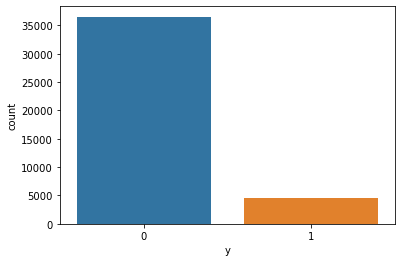

In [9]:
sns.countplot(x=data['y'])

## We can see that the target variable is imbalanced.

In [10]:
num= data.select_dtypes(np.number)

In [11]:
num.head(4)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
cat= data.select_dtypes('object')

In [13]:
cat.head(4)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent


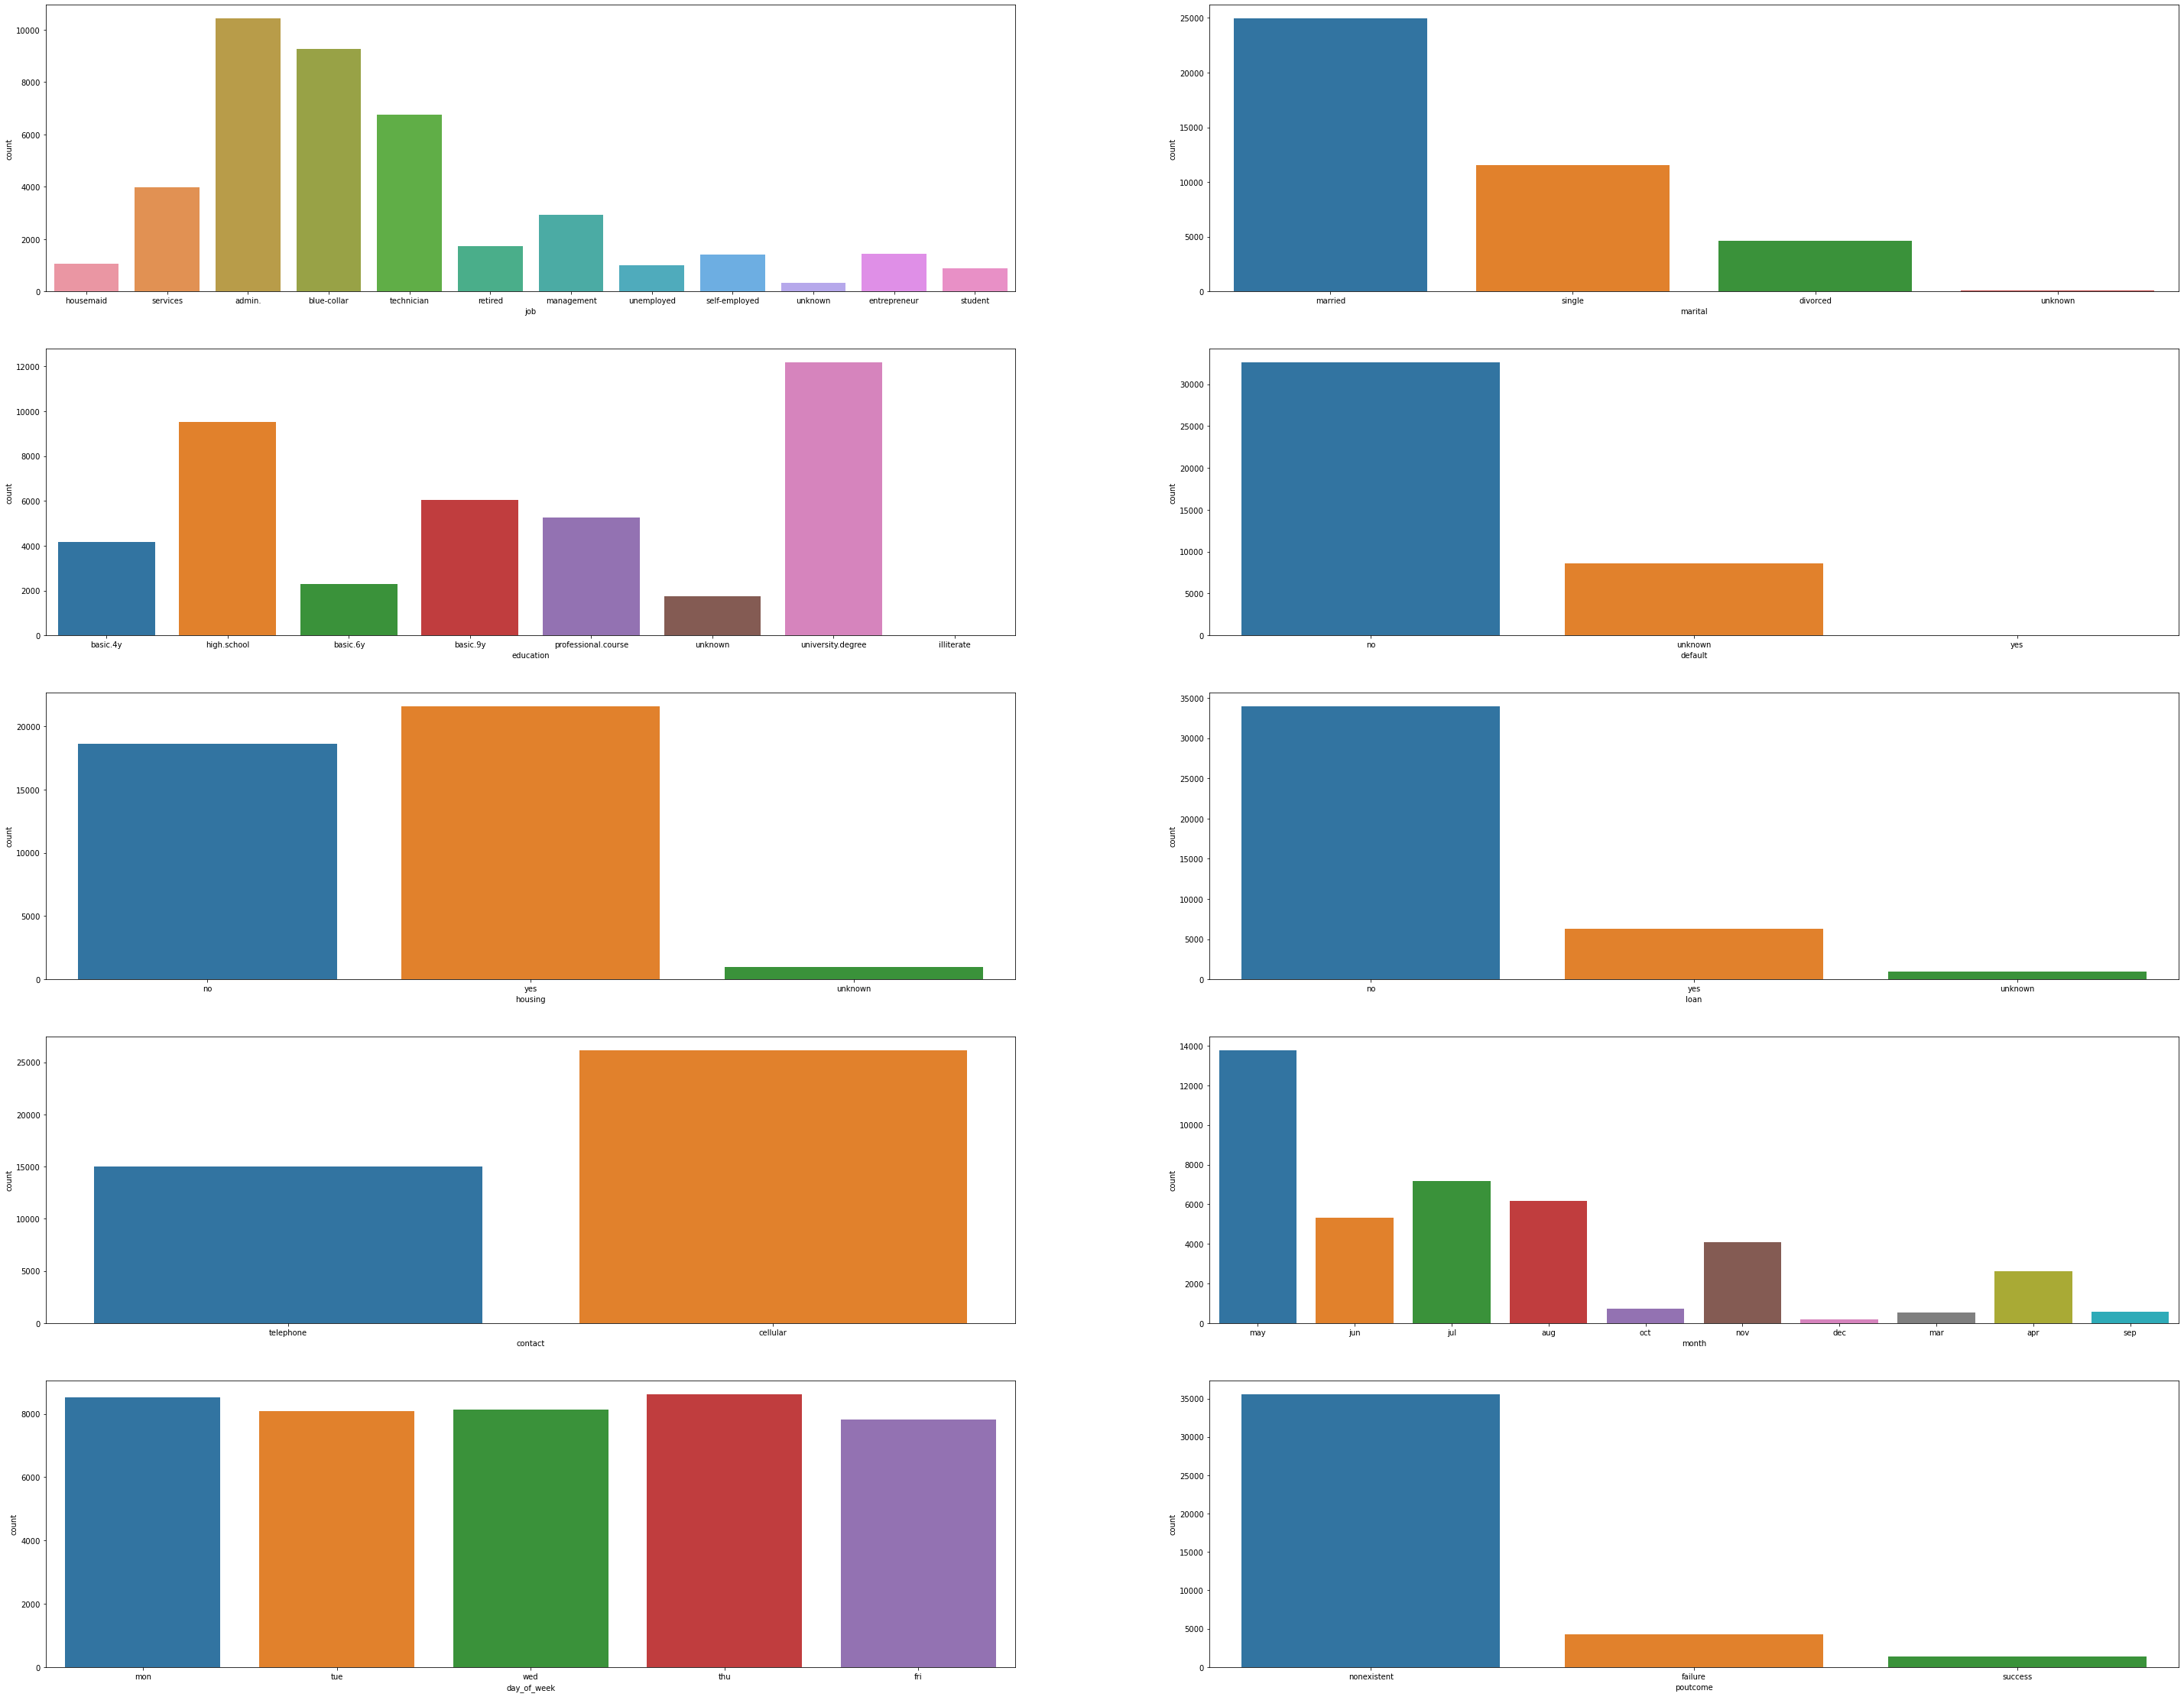

In [14]:
cat_col=[]
for column in data:
    if is_string_dtype(data[column]):
        cat_col.append(column)
fig, ax= plt.subplots(5,2, figsize=(50,40))
for variable, subplot in zip(cat_col, ax.flatten()):
    sns.countplot(data[variable], ax = subplot)
plt.show()

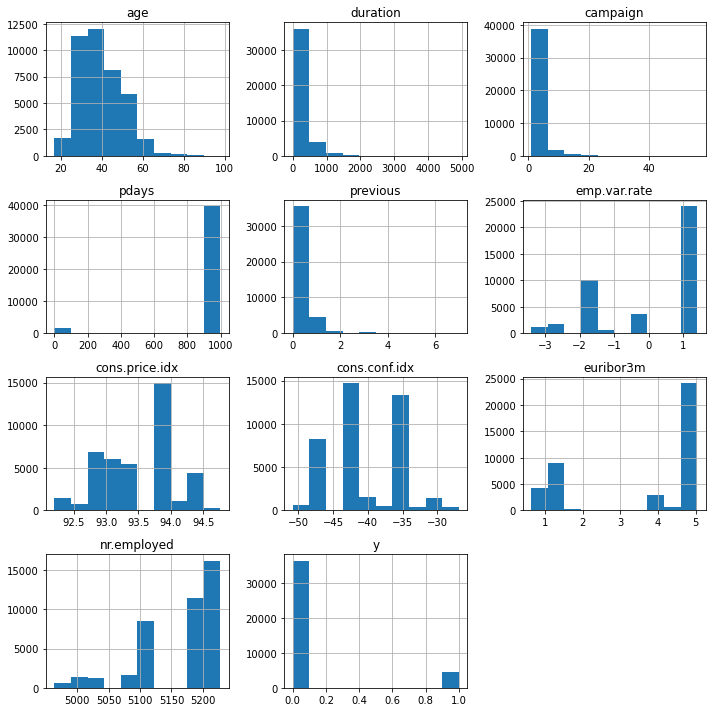

In [15]:
plt.rcParams['figure.figsize'] = [10, 10] 
data.hist()
plt.tight_layout()

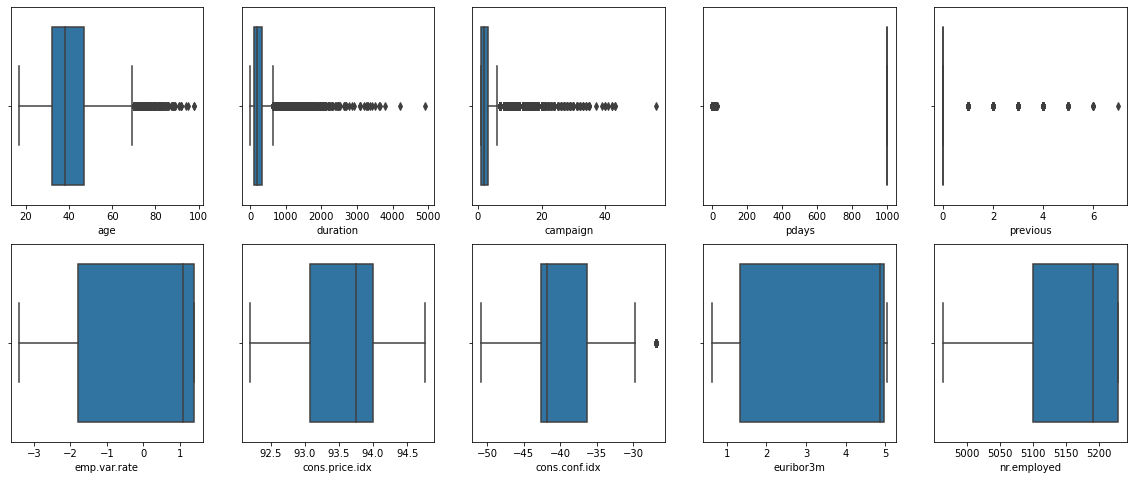

In [16]:
fig, ax= plt.subplots(2,5, figsize=(20,8))
for i, subplot in zip(list(num), ax.flatten()):
    sns.boxplot(x= num[i], ax= subplot)
plt.show()

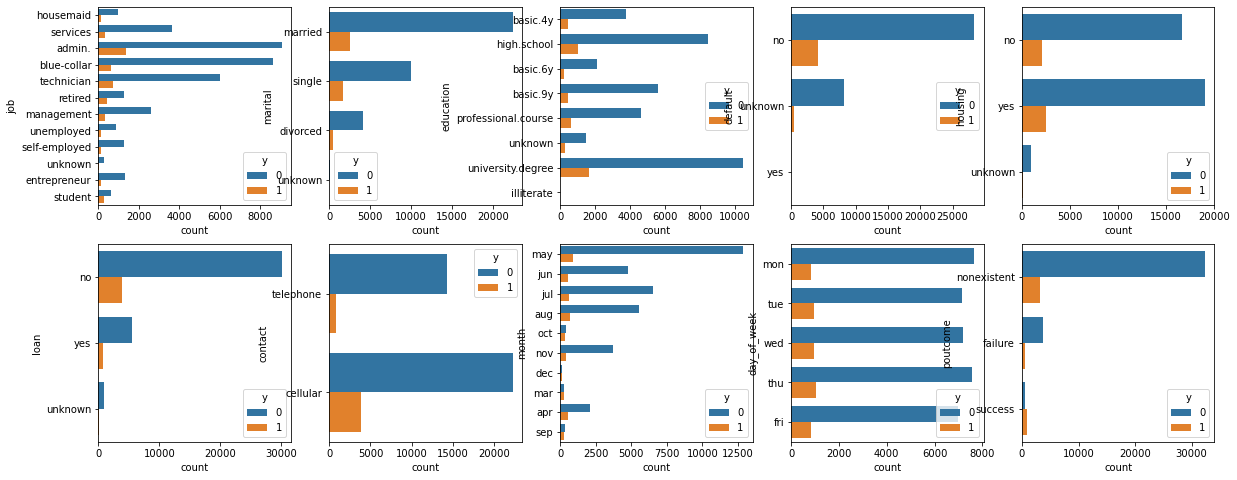

In [17]:
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(20,8))
for i,subplot in zip(list(cat),ax.flatten()):
    sns.countplot(y=cat[i],data=data,hue=data['y'],ax=subplot)
plt.show()

<AxesSubplot:>

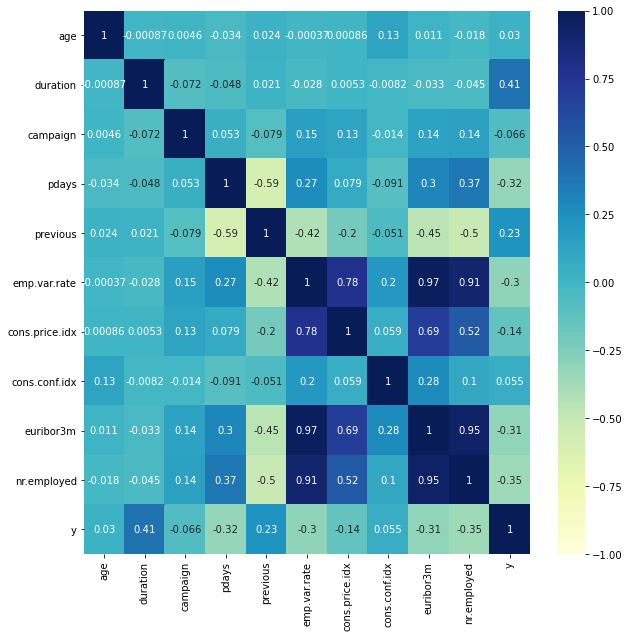

In [18]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')


In [19]:
# Check for skewness
skewed_data= data.skew()


In [20]:
skewed_data= skewed_data[(skewed_data>0.75 ) | (skewed_data<-0.75)]
skewed_data

age            0.784697
duration       3.263141
campaign       4.762507
pdays         -4.922190
previous       3.832042
nr.employed   -1.044262
y              2.450330
dtype: float64

In [21]:
num[['age','duration','campaign','pdays','previous','nr.employed']]= np.log1p(num[['age','duration','campaign','pdays','previous','nr.employed']])

In [22]:
num.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,5.568345,0.693147,6.907755,0.0,1.1,93.994,-36.4,4.857,8.554874,0
1,4.060443,5.010635,0.693147,6.907755,0.0,1.1,93.994,-36.4,4.857,8.554874,0
2,3.637586,5.424950,0.693147,6.907755,0.0,1.1,93.994,-36.4,4.857,8.554874,0


In [24]:
# Applying StandardScaler to all  numeric columns
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
num[['age','duration','campaign','pdays','previous','nr.employed','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]= scaler.fit_transform(num[['age','duration','campaign','pdays','previous','nr.employed','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']])

In [25]:
num.head(4)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.454127,0.431124,-0.8666,0.194381,-0.38141,0.648092,0.722722,0.886447,0.71246,0.33545,0
1,1.524415,-0.177114,-0.8666,0.194381,-0.38141,0.648092,0.722722,0.886447,0.71246,0.33545,0
2,-0.184544,0.274738,-0.8666,0.194381,-0.38141,0.648092,0.722722,0.886447,0.71246,0.33545,0
3,0.122550,-0.162669,-0.8666,0.194381,-0.38141,0.648092,0.722722,0.886447,0.71246,0.33545,0


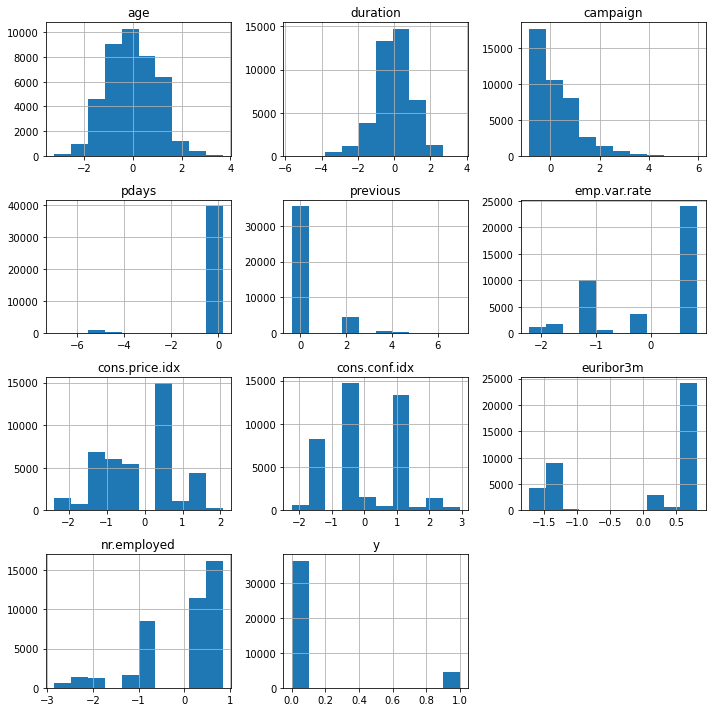

In [26]:
# check for histplot again after handling the skewness
num.hist()
plt.tight_layout()

In [29]:
cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [30]:
from skle.arn.preprocessing import OrdinalEncoder
ordinal= OrdinalEncoder()
cat[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']]= ordinal.fit_transform(cat[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']])

In [31]:
cat.head(4)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0


In [33]:
num.drop('y', axis=1, inplace=True)

In [34]:
data1= pd.concat([num, cat], axis=1)

In [37]:
y= data['y']

### Building Base Model

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data1, y, test_size=0.2, random_state=1)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [133]:
reg= LogisticRegression()
reg.fit(x_train, y_train)
y_pred= reg.predict(x_test)
y_prob= reg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7198   96]
 [ 746  198]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.67      0.21      0.32       944

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [93]:
ada= AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred= ada.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7117  177]
 [ 555  389]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7294
           1       0.69      0.41      0.52       944

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [44]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7067  227]
 [ 625  319]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7294
           1       0.58      0.34      0.43       944

    accuracy                           0.90      8238
   macro avg       0.75      0.65      0.69      8238
weighted avg       0.88      0.90      0.88      8238



In [45]:
svm= SVC()
svm.fit(x_train, y_train)
y_pred= svm.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7174  120]
 [ 660  284]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7294
           1       0.70      0.30      0.42       944

    accuracy                           0.91      8238
   macro avg       0.81      0.64      0.68      8238
weighted avg       0.89      0.91      0.89      8238



### When comparing f1-score, recall, accuracy of the Base Model we can say SVM is giving good results

### Since the target variable is imbalance we need to balance the target variable.

In [84]:
from imblearn.over_sampling import SMOTE
samp= SMOTE()


In [85]:
x2,y2= samp.fit_resample(data1,y)

<AxesSubplot:xlabel='y', ylabel='count'>

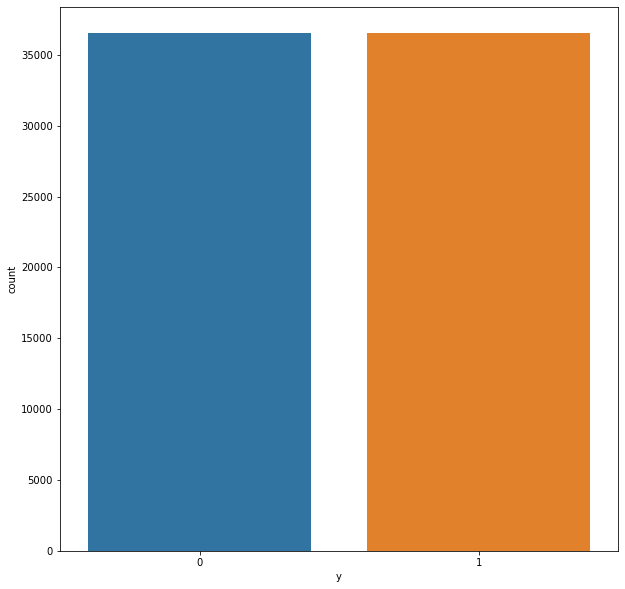

In [86]:
sns.countplot(x=y2)

# Feature selection using RandomForest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [89]:
feat_select= sfs(estimator=rf,k_features='best',forward=True,verbose=2,scoring='f1',n_jobs=-1)

In [90]:
feat_selection=feat_select.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   11.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.6s finished

[2021-01-22 13:59:57] Features: 1/20 -- score: 0.29547448172307933[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    9.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   10.3s finished

[2021-01-22 14:00:08] Features: 2/20 -- score: 0.40902755364739585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   21.4s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   27.6s finished

[2021-01-22 14:00:36] Features: 3/20 -- score: 0.5345175087522425[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  

In [94]:
feat_cols = list(feat_selection.k_feature_idx_)

In [95]:
feat_cols

[0, 1, 8, 11, 12, 13, 16, 17, 19]

In [96]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [97]:
data_new= data[['age','job','month','campaign','pdays','previous','cons.price.idx','cons.conf.idx','nr.employed']]

In [98]:
num_new= data_new.select_dtypes(np.number)

In [99]:
num_new.head(2)

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,56,1,999,0,93.994,-36.4,5191.0
1,57,1,999,0,93.994,-36.4,5191.0


In [110]:
cat_new= data_new.select_dtypes('object')

In [111]:
cat_new.head(2)

,job,month
0,housemaid,may
1,services,may


In [112]:
# Check for skewness
skewed_data= data_new.skew()

In [113]:
skewed_data= skewed_data[(skewed_data>0.75 ) | (skewed_data<-0.75)]
skewed_data

age            0.784697
campaign       4.762507
pdays         -4.922190
previous       3.832042
nr.employed   -1.044262
dtype: float64

In [1]:
num_new[['age','campaign','pdays','nr.employed','previous']]= np.log1p(num_new[['age','campaign','pdays','nr.employed','previous']])

NameError: name 'np' is not defined

In [ ]:
# Applying StandardScaler to all  numeric columns
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
num_new[['age','campaign','pdays','nr.employed','previous']]= scaler.fit_transform(num_new[['age','campaign','pdays','nr.employed','previous']])

In [114]:
num_new.head(3)

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,1.454127,-0.8666,0.194381,-0.38141,93.994,-36.4,0.33545
1,1.524415,-0.8666,0.194381,-0.38141,93.994,-36.4,0.33545
2,-0.184544,-0.8666,0.194381,-0.38141,93.994,-36.4,0.33545


In [115]:
cat_new.columns

Index(['job', 'month'], dtype='object')

In [117]:
from sklearn.preprocessing import OrdinalEncoder
ordinal= OrdinalEncoder()
cat_new[['job','month']]= ordinal.fit_transform(cat_new[['job', 'month']])

In [118]:
cat_new.head(3)

,job,month
0,3.0,6.0
1,7.0,6.0
2,7.0,6.0


In [119]:
data2= pd.concat([num_new, cat_new], axis=1)

In [120]:
x_new= data2

In [121]:
y_new= data['y']

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new, y_new, test_size=0.2, random_state=1)

In [126]:
reg1= LogisticRegression()
reg1.fit(x_train, y_train)
y_pred= reg1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7198   96]
 [ 746  198]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.67      0.21      0.32       944

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [127]:
ada1= AdaBoostClassifier()
ada1.fit(x_train, y_train)
y_pred= ada1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7199   95]
 [ 753  191]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.67      0.20      0.31       944

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [128]:
knn1= KNeighborsClassifier()
knn1.fit(x_train, y_train)
y_pred= knn1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7076  218]
 [ 679  265]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.55      0.28      0.37       944

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [129]:
svm1= SVC()
svm1.fit(x_train, y_train)
y_pred= svm1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7184  110]
 [ 736  208]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.65      0.22      0.33       944

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



# Result:


### Logistic Regression and AdaboostClassifier are best models with Accuracy: 90%, Recall= 99%, Precision=91 and f1-score=94.